In [4]:
# importing necessary packages

import os
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers 
import random
import pandas as pd
import numpy as np
   
import statistics
import seaborn as sns # For Data Visualization 
import matplotlib.pyplot as plt # Necessary module for plotting purpose
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LeakyReLU, Dropout, BatchNormalization, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow import keras 
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adagrad

# for hyperparameter tuning and KFoldCV
# from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold
# from scipy.stats import randint as sp_randint
# from scipy.stats import uniform as sp_uniform

# getting methods for confusion matrix, F1 score, Accuracy Score etc.
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, classification_report, make_scorer,recall_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

import warnings
warnings.simplefilter('ignore')

In [5]:
import json
import nltk
import string
import re # regular expression
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

import sklearn.metrics

# !pip install git+http://github.com/scikit-learn/scikit-learn.git  # for multilabel_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix as multilabel_confusion_matrix

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

# Remove stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

# for stemming of the sentence in part 1 of the project
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
os.chdir('/content/drive/My Drive/PyData/NLP_1')

In [8]:
#load the full set of the data
part1_data = pd.read_csv("blogtext.csv")

In [9]:
# check the shape of the data frame by using the shape attribute of the data frame
print('The shape of the dataframe is',part1_data.shape)

The shape of the dataframe is (681284, 7)


In [10]:
#check if the data frame is properly loaded using the sample() method
part1_data.sample(10)


,id,gender,age,topic,sign,date,text
644707,2755041,female,23,indUnk,Aquarius,"06,July,2004",I ride the train back & forth from CT t...
584902,3131115,female,15,Student,Pisces,"13,June,2004",I did it. I read Ashley's posts..and Am...
649213,2864160,male,41,Law,Capricorn,"15,June,2004",Today I was huffing and puffing up a st...
168001,1633534,male,39,Arts,Pisces,"22,June,2004",A new Beastie Boys' CD called 'To ...
428865,2895671,male,24,indUnk,Aries,"14,July,2004",Problem that is more often faced ...
219719,303162,female,38,indUnk,Virgo,"30,May,2004","Oh, people. That couldn't have gone bet..."
298455,1255453,male,17,Consulting,Aquarius,"20,July,2004","Since as of recent, I've been on a ..."
530659,3403381,female,33,Publishing,Pisces,"06,July,2004",I had a lovely three day week...
173852,8173,male,42,indUnk,Capricorn,"02,August,2004",urlLink Is there a point to a blog? P...
538914,15365,female,34,indUnk,Cancer,"25,October,2002","Sol Named for the sun, his son, with cur..."


In [11]:
#dropping duplicates and resetting index

part1_data.drop_duplicates(subset="text",inplace=True)
part1_data.reset_index(inplace = True,drop=True)

In [12]:
#size after removal
print('The shape of the dataframe is',part1_data.shape)

The shape of the dataframe is (611652, 7)


In [13]:
# checking for null values if any
part1_data.isna().any()

id        False
gender    False
age       False
topic     False
sign      False
date      False
text      False
dtype: bool

In [14]:
# dropping unnecessary columns 'id' and 'date'
part1_data.drop(['id','date'], axis=1, inplace=True)

In [15]:
part1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611652 entries, 0 to 611651
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   gender  611652 non-null  object
 1   age     611652 non-null  int64 
 2   topic   611652 non-null  object
 3   sign    611652 non-null  object
 4   text    611652 non-null  object
dtypes: int64(1), object(4)
memory usage: 23.3+ MB


In [16]:
#Checking no. of uique values in each column
print('Unique values in the column gender are',part1_data['gender'].nunique(),'\n')
print('Unique values in the column age are',part1_data['age'].nunique(),'\n')
print('Unique values in the column topic are',part1_data['topic'].nunique(),'\n')
print('Unique values in the column sign are',part1_data['sign'].nunique())


Unique values in the column gender are 2 

Unique values in the column age are 26 

Unique values in the column topic are 40 

Unique values in the column sign are 12


In [17]:
part1_data.describe(include='all')

,gender,age,topic,sign,text
count,611652,611652.000000,611652,611652,611652
unique,2,NaN,40,12,611652
top,female,NaN,indUnk,Cancer,"Info has been found (+/- 100 pages,..."
freq,307352,NaN,230835,60263,1
mean,NaN,24.160192,NaN,NaN,NaN
std,NaN,7.872840,NaN,NaN,NaN
min,NaN,13.000000,NaN,NaN,NaN
25%,NaN,17.000000,NaN,NaN,NaN
50%,NaN,24.000000,NaN,NaN,NaN
75%,NaN,27.000000,NaN,NaN,NaN


**EDA:**
Univariate analysis

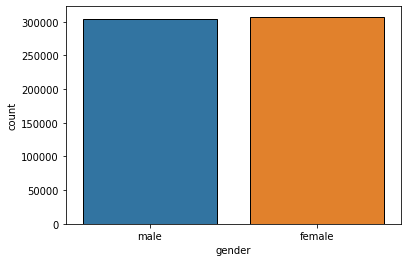

In [18]:
# Checking the distribtion of male and female
sns.countplot(x='gender',data=part1_data);

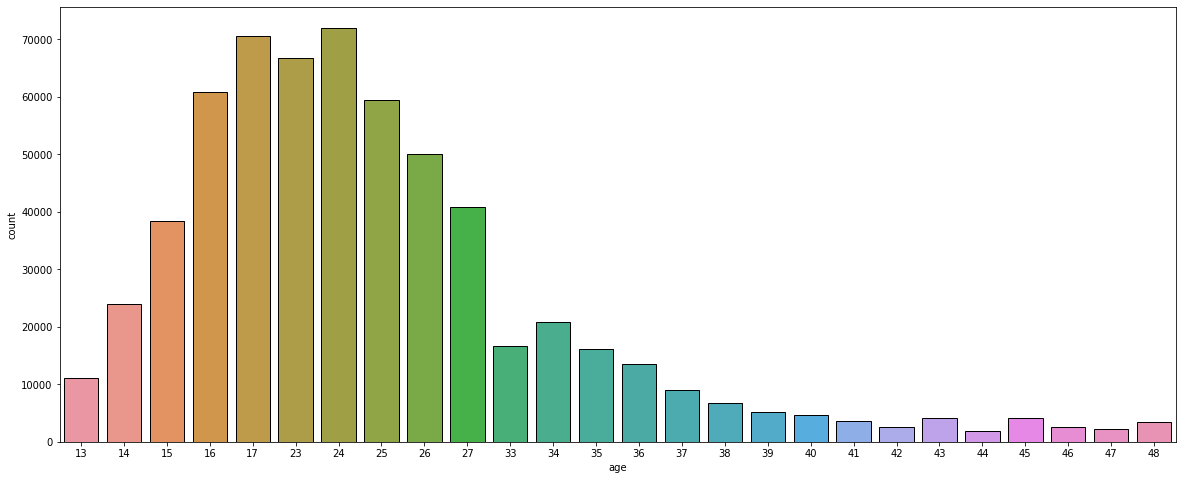

In [19]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x='age',data=part1_data);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

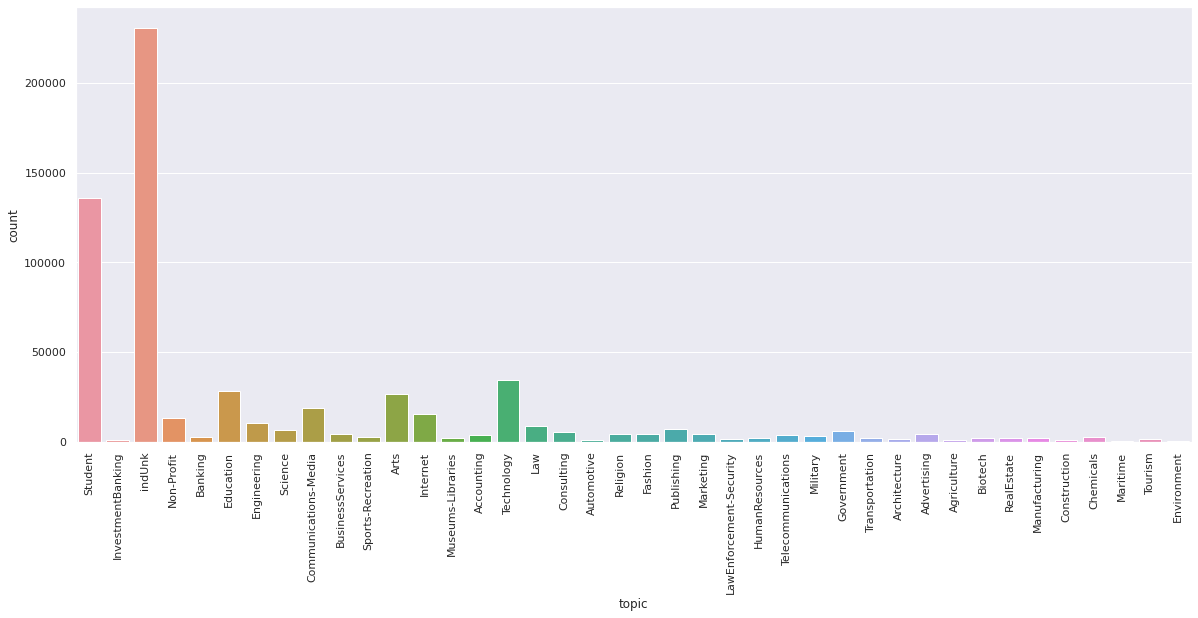

In [20]:
sns.set(rc={'figure.figsize':(15,8.27)})
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x='topic',data=part1_data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

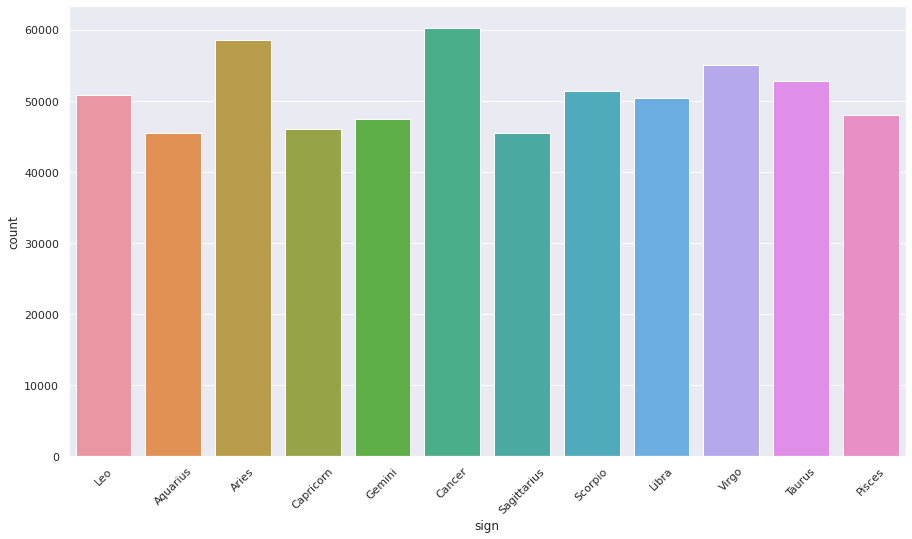

In [21]:
sns.countplot(x='sign',data=part1_data)
plt.xticks(rotation=45)

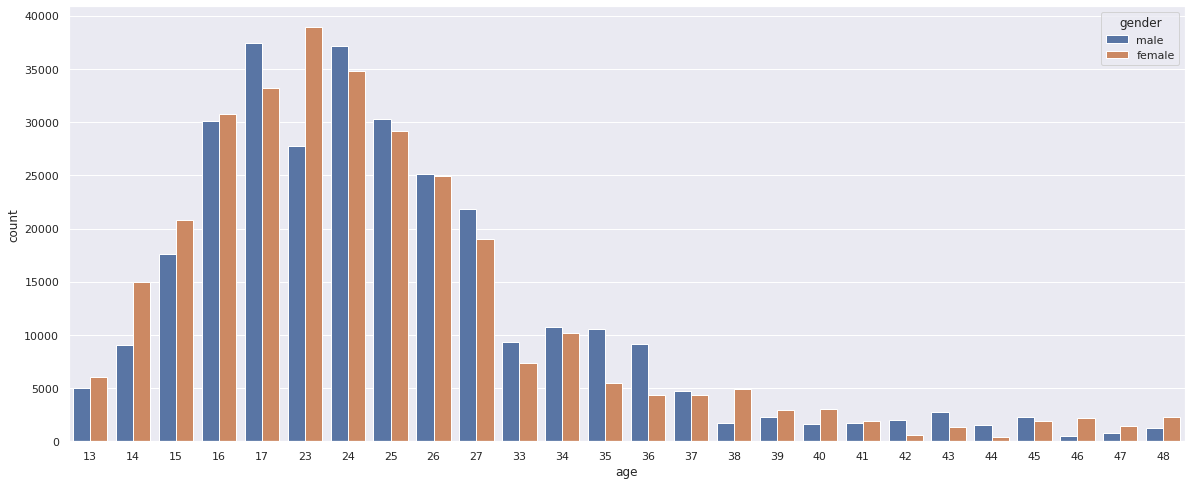

In [22]:
ig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x="age", hue="gender", data=part1_data);

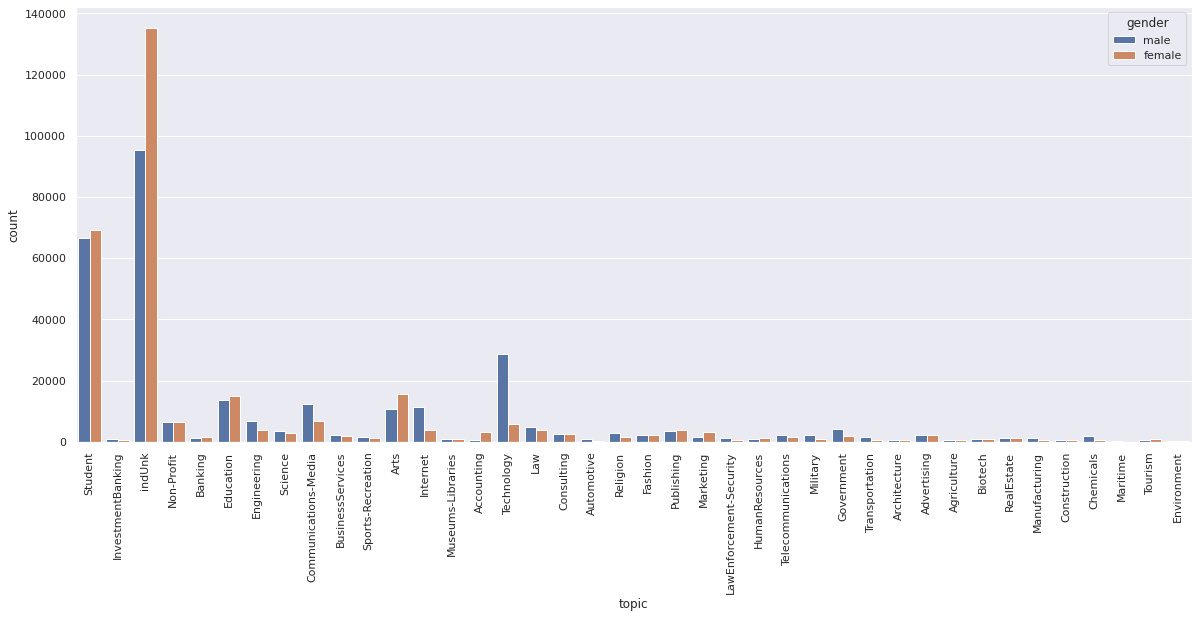

In [23]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x="topic", hue="gender", data=part1_data)
plt.xticks(rotation=90);

**Checking some of the blogs**

In [24]:
part1_data['text'][0]

'           Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html.         '

In [25]:
part1_data['text'][10]

"             Ah, the Korean language...it looks so difficult at first, then as you figure out how to read Hanguel (Korea's surprisingly easy-to-learn alphabet of 24 characters) it seems so easy. Then the vocabulary starts. Oh no. Then the backwards (to us) sentence structure.  Yikes!  Luckily there are many options for us slow-witted foreigners to take on the language.  Of course I could list them here but  urlLink this JoongAng article  says a lot and there are more resources  urlLink here .    Well, if you're a guy here is some motivation for you: Jeon Ji Hyun (전지현), the latest 20-something (24, actually) star of movies and CFs (I hear this means Commercial Feature, but not positive).  I saw her latest movie on Sunday night.  It's hard to describe the name...the English version is 'Windstruck' but the Korean version is 여친소 (yeochinso) which is short for 내여자친구를소개합니다 (ne yeojachingu rul sogayhamnida) or 'I'd like to introduce you to my girlfriend'.  Surprisingly, both titles make sens

In [26]:
part1_data['text'][2]

"           In het kader van kernfusie op aarde:  MAAK JE EIGEN WATERSTOFBOM   How to build an H-Bomb From: ascott@tartarus.uwa.edu.au (Andrew Scott) Newsgroups: rec.humor Subject: How To Build An H-Bomb (humorous!) Date: 7 Feb 1994 07:41:14 GMT Organization: The University of Western Australia  Original file dated 12th November 1990. Seemed to be a transcript of a 'Seven Days' article. Poorly formatted and corrupted. I have added the text between 'examine under a microscope' and 'malleable, like gold,' as it was missing. If anyone has the full text, please distribute. I am not responsible for the accuracy of this information. Converted to HTML by Dionisio@InfiNet.com 11/13/98. (Did a little spell-checking and some minor edits too.) Stolen from  urlLink http://my.ohio.voyager.net/~dionisio/fun/m...own-h-bomb.html  and reformatted the HTML. It now validates to XHTML 1.0 Strict. How to Build an H-Bomb Making and owning an H-bomb is the kind of challenge real Americans seek. Who wants to 

**Data preprocessing**

Firstly, the attribute 'age' ranges from 13 to 48. This is divided into three groups. Age 13-17 is classified to '10s blog', 23-27 to '20s blog' and beyond 33 is '30s blog'.

In [27]:
# converting ages into categories.
part1_data['age'].replace(np.arange(13,18),'10s blog', inplace= True)
part1_data['age'].replace(np.arange(23,28),'20s blog', inplace= True)
part1_data['age'].replace(np.arange(33,49),'30s blog', inplace= True)

In [28]:
part1_data['age'].value_counts()

20s blog    289067
10s blog    204864
30s blog    117721
Name: age, dtype: int64

In [29]:
#Converting sign into lower case
part1_data['sign'] = part1_data['sign'].str.lower()

In [30]:
#converting genders into another characterset for easier transformation of predictions. check 'classes_y' in train test split section

part1_data['gender'].replace('male','4male', inplace= True)
part1_data['gender'].replace('female','5female', inplace= True)

In [31]:
# replacing indUnk with Unknown_industry in the topic column
part1_data['topic'].replace('indUnk','Unknown_industry', inplace= True)

In [32]:
# getting unique items of each column to be used later when converting probabilities from Neural network classifier to 0s and 1s

age_unique = part1_data['age'].nunique()
gender_unique = part1_data['gender'].nunique()
topic_unique = part1_data['topic'].nunique()
sign_unique = part1_data['sign'].nunique()


**The dataset has more than 6 million data points. Model building, training and testing will take a lot of time and hence only a subset of it is considered.**

In [33]:
## subsetting the dataset, considering that the size of dataset is large, execution is taking time if more rows are included specially at the stage of model building, training, testing and execution 

part1_data_sample = part1_data.groupby('age').sample(n=35000, random_state=1)   # taking random 35000 data entries from each of the age group
part1_data_sample.reset_index(inplace=True,drop=True)
part1_data_sample.head(10)

,gender,age,topic,sign,text
0,4male,10s blog,Unknown_industry,sagittarius,"For those of you on Friendster, and mos..."
1,5female,10s blog,Unknown_industry,capricorn,"Wearing: Tool band tee, dickies, socks..."
2,4male,10s blog,Student,libra,since afternoon i've been doin nuthin o...
3,4male,10s blog,Student,sagittarius,Today: * Two point five weeks of...
4,5female,10s blog,Unknown_industry,pisces,day 3: flag day helloz aga...
5,5female,10s blog,Student,aquarius,halo..tis few days abit bus...
6,5female,10s blog,Student,taurus,ahahaha me and em are the coolest!!!!!!...
7,4male,10s blog,Unknown_industry,scorpio,"Well friends, the Englewood Beach was a..."
8,5female,10s blog,Student,virgo,Hi...i am sick and at home...m...
9,4male,10s blog,Unknown_industry,scorpio,Feeling guilty for leaving people out. ...


In [34]:
print('The shape of the dataframe to be used for further analysis is',part1_data_sample.shape)

The shape of the dataframe to be used for further analysis is (105000, 5)


**Data cleansing by removing unwanted characters, spaces, stop words etc. Convert text to lowercase**

In [35]:
part1_data_sample['clean_data']=part1_data_sample['text'].apply(lambda x: re.sub(r'[^A-Za-z]+',' ',x))  # keeping only english alphabets strings. removing numbers, the brackets, the full stops etc. 
part1_data_sample['clean_data']=part1_data_sample['clean_data'].apply(lambda x: re.sub(r'urlLink|urllink','',x))   # remove all the places where the string urllink comes
part1_data_sample['clean_data']=part1_data_sample['clean_data'].apply(lambda x: re.sub(r'https?\S+','',x))   # remove all the places where any url comes that starts with http or https
part1_data_sample['clean_data']=part1_data_sample['clean_data'].apply(lambda x: x.lower())   # lowercase each word in the string
part1_data_sample['clean_data']=part1_data_sample['clean_data'].apply(lambda x: x.strip())   # remove spaces
part1_data_sample['clean_data']=part1_data_sample['clean_data'].apply(lambda x: ' '.join([words for words in x.split() if words not in stopwords]))   # removing stop words
part1_data_sample['clean_data']=part1_data_sample['clean_data'].apply(lambda x: re.sub(r'\b\w{1,2}\b','',x))    # removing any word of length less than equal to 2
part1_data_sample['clean_data']=part1_data_sample['clean_data'].apply(lambda x: ' '.join(dict.fromkeys(x.split())))   # removing duplicate words

In [36]:
# Remove Non-English Words from Normalized text

words = set(nltk.corpus.words.words())
def remove_non_english_words(blog):
    return " ".join(w for w in nltk.wordpunct_tokenize(blog) if w.lower() in words or not w.isalpha())

part1_data_sample['clean_data'] = part1_data_sample['clean_data'].apply(remove_non_english_words)


In [37]:
# lemmatizing the text
nltk.download('omw-1.4')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def lemmatize_text(text):
    return [lmtzr.lemmatize(w) for w in w_tokenizer.tokenize(text)]

part1_data_sample['clean_data'] = part1_data_sample['clean_data'].apply(lemmatize_text)


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [38]:
# stemming the text 

stemmer = SnowballStemmer("english")
part1_data_sample['clean_data'] = part1_data_sample['clean_data'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

In [39]:
#Comparing one arbitrary text before and after cleaning

print(part1_data_sample['text'][10],'\n')
print(part1_data_sample['clean_data'][10])

           i know, and hence the comparison to hobbes. he said life was nasty brutish and short, but also advocated a strong central ruler as able to take charge of life and preserve the common man. life was bad, but a strong central leader can overcome that he argued. i'm saying it's more like locke. life is intrinsically good. we screw it up, complicate it, and confuse ourselves to death, but there are moments in there that are just so surreally good, moments where you feel so indeniably alive, moments where no one on earth can't say that, just for an instant, everything was worth it. hell, we live in those moments. either during them, or thinking of them. dreams, memories, those times where you just zone out and mentally go to another place and time are people trying to relive those moments. life is incredibly beautiful, awesome and scary. it's like trying to hold a supernova in your hand and being vaporized, turned into dust and energy cascading on the expanding exploding wavefront

In [40]:
part1_data_sample.sample(10)

,gender,age,topic,sign,text,clean_data
34300,4male,10s blog,Student,sagittarius,You all know who this guy is. Politica...,"[know, guy, polit, activist, former, rage, mac..."
77967,4male,30s blog,Unknown_industry,gemini,' ... and you may tell yourse...,"[may, tell, beauti, hous]"
76684,4male,30s blog,Advertising,sagittarius,Why is there a light in the fridge and not...,"[light, freezer]"
64460,5female,20s blog,Education,virgo,urlLink She's on the kill list....,"[kill, list, soon, day, look, name, god, sake,..."
81647,4male,30s blog,Military,scorpio,My favorite e...,"[favorit, essay, ralph, self, relianc, charact..."
54653,5female,20s blog,Unknown_industry,capricorn,urlLink american bandstand is comi...,"[bandstand, come, back, go, releas, smile, new..."
2476,4male,10s blog,Student,capricorn,yo peepz....woke up at 6.45 todae...,"[woke, prepar, breakfast, bad, huh, went, socc..."
9606,4male,10s blog,Student,capricorn,I watched some shows on various French ...,"[watch, various, today, liter, never, first, d..."
43825,5female,20s blog,Arts,sagittarius,"So, Moore's found a distribut...","[found, distributor, much, form, compani, rele..."
80230,4male,30s blog,Arts,taurus,AROUND THE WORLD IN 80 DAYS (1956...,"[around, world, day, direct, base, novel, tour..."


**Target/label merger and transformation:**

In [41]:
#As we want to make this into a multi-label classification problem, I have merged the columns 'age', 'gender', 'topic' and 'sign' 
#together so that we have all the labels together for a particular sentence.
part1_data_sample['labels']=part1_data_sample.apply(lambda col: [col['gender'],str(col['age']),col['topic'],col['sign']], axis=1)


In [42]:
# drop  gender,age,topic & sign as they are already merged to labels column

part1_data_sample.drop(columns=['gender','age','topic','sign'], axis=1, inplace=True)

In [43]:
part1_data_sample.head()

,text,clean_data,labels
0,"For those of you on Friendster, and mos...","[see, whenev, complet, ask, love, ever, alway,...","[4male, 10s blog, Unknown_industry, sagittarius]"
1,"Wearing: Tool band tee, dickies, socks...","[wear, tool, band, tee, listen, jenni, wrap, p...","[5female, 10s blog, Unknown_industry, capricorn]"
2,since afternoon i've been doin nuthin o...,"[sinc, afternoon, yeah, see, watch, kill, bill...","[4male, 10s blog, Student, libra]"
3,Today: * Two point five weeks of...,"[today, two, point, five, math, done, six, boo...","[4male, 10s blog, Student, sagittarius]"
4,day 3: flag day helloz aga...,"[day, flag, yest, whole, class, togeth, talk, ...","[5female, 10s blog, Unknown_industry, pisces]"


In [44]:
# dividing the dataset into X and y and binarizing y label

X_small = part1_data_sample['clean_data']
y_small = part1_data_sample['labels']

multilabel_binarizer = MultiLabelBinarizer()
y_mlb=multilabel_binarizer.fit_transform(y_small)

In [45]:
classes_y= multilabel_binarizer.classes_
print(classes_y)  

['10s blog' '20s blog' '30s blog' '4male' '5female' 'Accounting'
 'Advertising' 'Agriculture' 'Architecture' 'Arts' 'Automotive' 'Banking'
 'Biotech' 'BusinessServices' 'Chemicals' 'Communications-Media'
 'Construction' 'Consulting' 'Education' 'Engineering' 'Environment'
 'Fashion' 'Government' 'HumanResources' 'Internet' 'InvestmentBanking'
 'Law' 'LawEnforcement-Security' 'Manufacturing' 'Maritime' 'Marketing'
 'Military' 'Museums-Libraries' 'Non-Profit' 'Publishing' 'RealEstate'
 'Religion' 'Science' 'Sports-Recreation' 'Student' 'Technology'
 'Telecommunications' 'Tourism' 'Transportation' 'Unknown_industry'
 'aquarius' 'aries' 'cancer' 'capricorn' 'gemini' 'leo' 'libra' 'pisces'
 'sagittarius' 'scorpio' 'taurus' 'virgo']


In [46]:
len(X_small)

105000

It can be seen that the classes are arranged beautifully, with the first three denoting age, next two denoting gender, next the topic and finally the signs. This sequence will be useful when converting output from neural network (probabilities) into a vector with 0s and 1s for further comparison. (Done later).

In [47]:
# using iterative stratification for splitting in multilabel
# defining a function multilabel_train_test_split

!pip install iterative-stratification
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit
from sklearn.utils import indexable, _safe_indexing
from sklearn.utils.validation import _num_samples
from sklearn.model_selection._split import _validate_shuffle_split
from itertools import chain

def multilabel_train_test_split(*arrays,
                                test_size=None,
                                train_size=None,
                                random_state=None,
                                shuffle=True,
                                stratify=None):

    # Train test split for multilabel classification. Uses the algorithm from: 
    # 'Sechidis K., Tsoumakas G., Vlahavas I. (2011) On the Stratification of Multi-Label Data'.

    if stratify is None:
        return train_test_split(*arrays, test_size=test_size,train_size=train_size,
                                random_state=random_state, stratify=None, shuffle=shuffle)
    
    assert shuffle, "Stratified train/test split is not implemented for shuffle=False"
    
    n_arrays = len(arrays)
    arrays = indexable(*arrays)
    n_samples = _num_samples(arrays[0])
    n_train, n_test = _validate_shuffle_split(
        n_samples, test_size, train_size, default_test_size=0.25
    )
    cv = MultilabelStratifiedShuffleSplit(test_size=n_test, train_size=n_train, random_state=123)
    train, test = next(cv.split(X=arrays[0], y=stratify))

    return list(
        chain.from_iterable(
            (_safe_indexing(a, train), _safe_indexing(a, test)) for a in arrays
        )
    )

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
# stratified train test split

X_train_final, X_test_final, y_train_final, y_test_final = multilabel_train_test_split(X_small, y_mlb, stratify=y_mlb, test_size=0.20)

In [49]:
print('The shape of the train data is',X_train_final.shape,'\n')
print('The shape of the test data is',X_test_final.shape)

The shape of the train data is (83999,) 

The shape of the test data is (21001,)


In [50]:
print('The shape of the train data is',y_train_final.shape,'\n')
print('The shape of the test data is',y_test_final.shape)

The shape of the train data is (83999, 57) 

The shape of the test data is (21001, 57)


**Vectorisation, etc.**

In [51]:
#X_train_final_tokens = X_train_final.apply(nltk.word_tokenize)
X_train_tokens_list = X_train_final.tolist()

In [52]:
# X_test_final_tokens = X_test_final.apply(nltk.word_tokenize)
X_test_tokens_list = X_test_final.tolist()

In [53]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip

with open("glove.6B.300d.txt", "rb") as lines:
   w2v = {line.split()[0]: np.array(map(float, line.split()[1:]))
         for line in lines}


In [54]:
import gensim
# let X be a list of tokenized texts (i.e. list of lists of tokens)
model_w2v = gensim.models.Word2Vec(X_train_tokens_list, size=10000)
w2v = dict(zip(model_w2v.wv.index2word, model_w2v.wv.syn0))

In [55]:
class MeanEmbeddingVectorizer(object):
   def __init__(self, word2vec):
       self.word2vec = word2vec
       # if a text is empty we should return a vector of zeros
       # with the same dimensionality as all the other vectors
       # self.dim = len(word2vec.itervalues().next())
       self.dim = 10000

   def fit(self, X, y):
       return self

   def transform(self, X):
       return np.array([
           np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                   or [np.zeros(self.dim)], axis=0)
           for words in X
       ])

In [ ]:
me_vector = MeanEmbeddingVectorizer(w2v)
X_train_transformed = me_vector.transform(X_train_tokens_list)
X_test_transformed = me_vector.transform(X_test_tokens_list)


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model_lr=LogisticRegression(C=1.0, penalty='l2', dual=False, solver='lbfgs')
model_lr=OneVsRestClassifier(model_lr)
model_lr.fit(X_train_transformed,y_train_final)

In [ ]:
model_svm=LinearSVC(C=1.0, penalty='l1', dual=False, loss='squared_hinge')
model_svm=OneVsRestClassifier(model_svm)
model_svm.fit(X_train_transformed,y_train_final)

In [ ]:
model_nb=MultinomialNB(alpha=1.0)
model_nb=OneVsRestClassifier(model_svm)
model_nb.fit(X_train_transformed,y_train_final)

In [ ]:
Ypred=model_svm.predict(X_test_transformed)

In [ ]:
Ypred

Using micro and macro average method

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def display_metrics_micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Micro', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: Micro', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: Micro', recall_score(Ytest, Ypred, average='micro'))
    

def display_metrics_macro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Macro', f1_score(Ytest, Ypred, average='macro'))
    print('Average recall score: MAcro', recall_score(Ytest, Ypred, average='macro'))

def display_metrics_weighted(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: weighted', f1_score(Ytest, Ypred, average='weighted'))
    print('Average precision score: weighted', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(Ytest, Ypred, average='weighted')) 



In [ ]:
display_metrics_micro(y_test_final,Ypred)

In [ ]:
display_metrics_macro(y_test_final,Ypred)

In [ ]:
display_metrics_weighted(y_test_final,Ypred)

In [ ]:
preds = Ypred[:15]
actuals = y_test_final[:15]

In [ ]:
five_actual = multilabel_binarizer.inverse_transform(actuals)
five_actual

In [ ]:
five_pred = multilabel_binarizer.inverse_transform(preds)
five_pred

**Print true label and predicted label for any five examples**

In [ ]:
print(multilabel_binarizer.inverse_transform(Ypred)[877])
print(multilabel_binarizer.inverse_transform(y_test_final)[877])

In [ ]:
print(multilabel_binarizer.inverse_transform(Ypred)[514])
print(multilabel_binarizer.inverse_transform(y_test_final)[514])


In [ ]:
print(multilabel_binarizer.inverse_transform(Ypred)[99])
print(multilabel_binarizer.inverse_transform(y_test_final)[99])

In [ ]:
print(multilabel_binarizer.inverse_transform(Ypred)[499])
print(multilabel_binarizer.inverse_transform(y_test_final)[499])

**Print truth table and predicted label for any five example**

In [ ]:
import random
j=[]
for i in range(5):
    j.append(random.randint(300,len(Ypred)))
   
print(j)

for k in j:    
    print(multilabel_binarizer.inverse_transform(Ypred)[k])
    print(multilabel_binarizer.inverse_transform(y_test_final)[k])
    
        

In [ ]:
Ypred_inversed = multilabel_binarizer.inverse_transform(Ypred)
y_test_inversed = multilabel_binarizer.inverse_transform(y_test_final)
for i in range(5):
    print('Text:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_test_transformed[i],
        ','.join(y_test_inversed[i]),
        ','.join(Ypred_inversed[i])
    ))

**Use a linear classifier (LinearSVC is used in the following) of your choice, wrap it up in OneVsRestClassifier to train it on every label**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

def build_model_train(X_train, y_train, X_valid=None, y_valid=None, C=1.0, model='lr'):
    if model=='lr':
        model = LogisticRegression(C=C, penalty='l1', dual=False, solver='liblinear')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='svm':
        model = LinearSVC(C=C, penalty='l1', dual=False, loss='squared_hinge')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    elif model=='nbayes':
        model = MultinomialNB(alpha=1.0)
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
        
    elif model=='lda':
        model = LinearDiscriminantAnalysis(solver='svd')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    return model    

In [ ]:
models = ['lr','svm','nbayes']
for model in models:
    model = build_model_train(X_train_transformed,y_train_final,model=model)
    model.fit(X_train_transformed,y_train_final)
    Ypred=model.predict(X_train_transformed)
    print("\n")
    print(f"**displaying  metrics for the mode {model}\n")
    display_metrics_micro(y_test_final,Ypred)
    print("\n")
    print("\n")
    display_metrics_macro(y_test_final,Ypred)
    print("\n")
    print("\n")
    display_metrics_weighted(y_test_final,Ypred)
    print("\n")
    print("\n")